In [2]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

# Собираем вакансии
Проходимся по страницам и по заданным параметрам собираем необходимую информацию



In [14]:
def get_vacancies():
    url = 'https://api.hh.ru/vacancies'
    jsons_list = []

    for num_page in range(20):
        params = {'text': 'разработчик', 'per_page': '100', 'page': num_page, 'excluted_text': 'менеджер'}
        src = requests.get(url, params=params)
        jsons_list.append(src.json())

    return jsons_list

In [15]:
vacancies = get_vacancies()

# Создаем DataFrame
DataFrame с заголовками, которые соответствуют информации из API

In [16]:
data = pd.DataFrame(columns=['name', 'alternate_url',  'created_at', 'archived', 'experience',
                            'salary_from', 'salary_to', 'salary_currency', 'salary_how', 'gross',
                            'work_format', 'working_hours', 'work_days', 'employment_form',
                            'accept_temporary', 'has_test', 'internship', 'night_shifts',
                            'employer', 'employer_url', 'accredited_it',
                            'city', 'street', 'building'])
data

,name,alternate_url,created_at,archived,experience,salary_from,salary_to,salary_currency,salary_how,gross,...,accept_temporary,has_test,internship,night_shifts,employer,employer_url,accredited_it,city,street,building


# Собираем информацию в DataFrame
По полученным данным из API заполняем DataFrame

In [17]:
for page in vacancies:
  for vacancy in page['items']:
      id = vacancy['id']
      name = vacancy['name']

      if vacancy['salary_range']:
          salary_from = vacancy['salary_range'].get('from', None)
          salary_to = vacancy['salary_range'].get('to', None)
          salary_currency = vacancy['salary_range'].get('currency', None)
          gross = vacancy['salary_range'].get('gross', False)
          salary_how = vacancy['salary_range']['mode']['name'] if vacancy['salary_range']['mode'] else None
      else:
          salary_from, salary_to, salary_currency, gross, salary_how = None, None, None, None, None

      accept_temporary = vacancy.get('accept_temporary', None)

      if vacancy['address']:
          city = vacancy['address'].get('city', None)
          street = vacancy['address'].get('street', None)
          building = vacancy['address'].get('building', None)
      else:
          city, street, building = None, None, None

      alternate_url = vacancy.get('alternate_url', None)
      archived = vacancy.get('archived', None)
      created_at = pd.to_datetime(vacancy.get('created_at', None))

      if vacancy['employer']:
          employer = vacancy['employer'].get('name', None)
          employer_url = vacancy['employer'].get('alternate_url', None)
          accredited_it = vacancy['employer'].get('accredited_it_employer', None)
      else:
          employer, employer_url, accredited_it = None, None, None

      experience = vacancy['experience']['name'] if vacancy['experience'] else None
      has_test = vacancy.get('has_test', None)
      internship = vacancy.get('internship', None)
      night_shifts = vacancy.get('night_shifts', None)

      employment_form = vacancy['employment_form']['name'] if vacancy['employment_form'] else None
      work_format = vacancy['work_format'][0]['name'] if vacancy['work_format'] else None
      work_days = vacancy['work_schedule_by_days'][0]['name'] if vacancy['work_schedule_by_days'] else None
      working_hours = vacancy['working_hours'][0]['name'] if vacancy['working_hours'] else None

      data.loc[id] = [# Основная информация о вакансии
                      name, alternate_url,  created_at, archived, experience,
                      # Зарплата
                      salary_from, salary_to, salary_currency, salary_how, gross,
                      # Условия работы
                      work_format, working_hours, work_days, employment_form,
                      accept_temporary, has_test, internship, night_shifts,
                      # Работодатель
                      employer, employer_url, accredited_it,
                      # Местоположение
                      city, street, building]

In [27]:
data.head()

,name,alternate_url,created_at,archived,experience,salary_from,salary_to,salary_currency,salary_how,gross,...,accept_temporary,has_test,internship,night_shifts,employer,employer_url,accredited_it,city,street,building
128756629,QA Engineer,https://hh.ru/vacancy/128756629,2025-12-15 15:43:00+03:00,False,От 1 года до 3 лет,None,None,None,None,None,...,False,False,False,False,red_mad_robot,https://hh.ru/employer/567799,False,Москва,Ленинский проспект,15А
127913105,Менеджер проектов в Академии iSpring,https://hh.ru/vacancy/127913105,2025-11-20 12:32:57+03:00,False,От 1 года до 3 лет,None,None,None,None,None,...,False,False,False,False,iSpring,https://hh.ru/employer/1296244,True,Йошкар-Ола,Вознесенская улица,110
128709717,Java Backend Developer (Вакансия только для гр...,https://hh.ru/vacancy/128709717,2025-12-12 15:40:04+03:00,False,От 3 до 6 лет,20000000,None,UZS,За месяц,True,...,False,False,False,False,ГУ ADLIYA ORGANLARI VA MUASSASALARIDA AXBOROT-...,https://hh.ru/employer/12424964,False,Ташкент,улица Тараса Шевченко,7
127889519,Frontend-разработчик (React Native),https://hh.ru/vacancy/127889519,2025-12-15 15:53:46+03:00,False,От 1 года до 3 лет,160000,None,RUR,За месяц,False,...,False,False,False,False,КСК ЭКСПЕРТ,https://hh.ru/employer/4875967,False,Москва,Серпуховско-Тимирязевская линия,метро Тульская
128589609,Unity C# Developer,https://hh.ru/vacancy/128589609,2025-12-09 19:06:17+03:00,False,От 3 до 6 лет,None,None,None,None,None,...,False,False,False,False,Фриплэй,https://hh.ru/employer/5421226,False,None,None,None


# Сравним данные
Составим гистограмму с распределением вакансий по городам

In [28]:
pd.set_option('display.max_rows', None)
vacancy_cities = data.groupby('city').count()['name']
mask = vacancy_cities < 20
other_sum = vacancy_cities[mask].sum()
vacancy_cities = vacancy_cities[~mask]
vacancy_cities['Другие'] = other_sum
vacancy_cities = vacancy_cities.sort_values(ascending=False)
vacancy_cities

,name
city,
Москва,553
Другие,299
Санкт-Петербург,127
Алматы,76
Минск,52
Ташкент,46
Астана,36
Казань,26
Краснодар,24


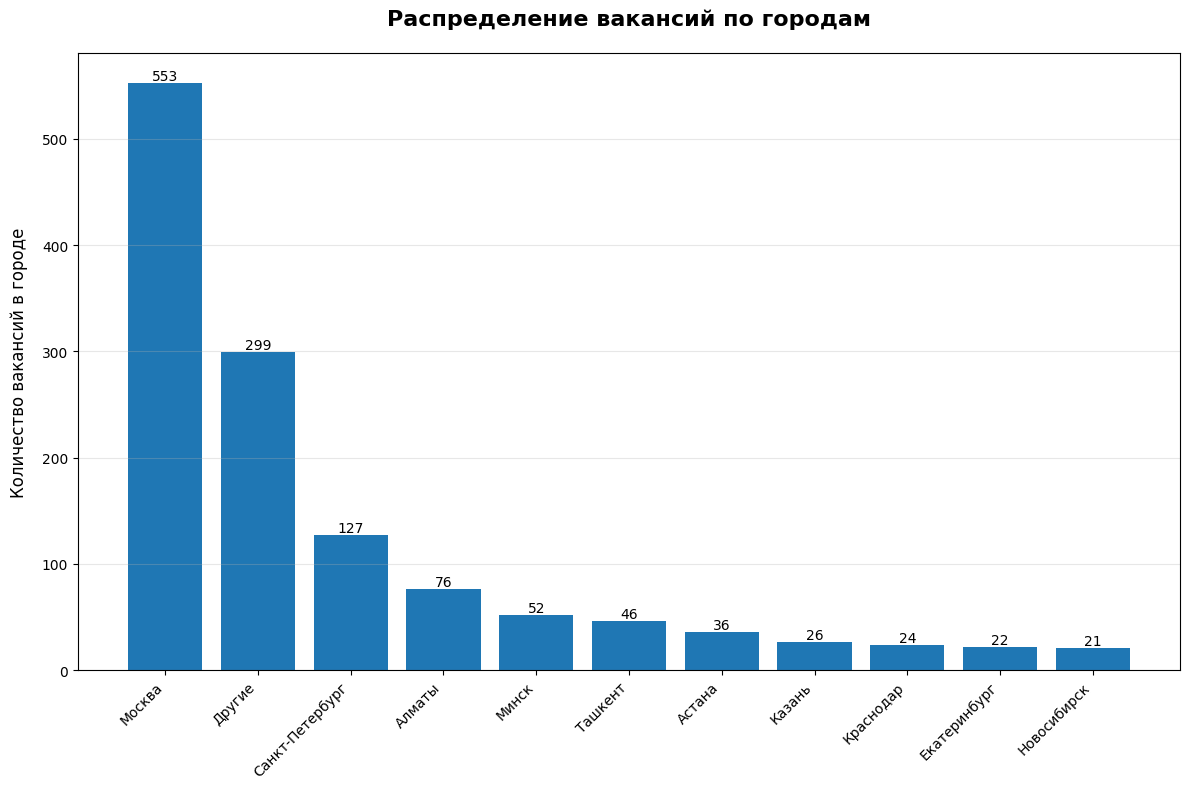

In [29]:
plt.figure(figsize=(12, 8))

bars = plt.bar(vacancy_cities.index, vacancy_cities.values)

plt.title('Распределение вакансий по городам', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Количество вакансий в городе', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()

plt.show()